In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib as m_plt
from matplotlib import pyplot as plt

from copy import copy
from pprint import pprint

import sys
import os

import personal_plotter as p_plt

# Practica II - Data Exploration Part 3

_ _ _
___
_ _ _


## 1.- Data 1 - Boston House Pricing

### 1.1.- Retrieving Data

#### 1.1.1.- Reading Data

In [2]:
try :
    boston_dataset = pd.read_csv("./boston/housing.data", sep="\t", header=None)
    boston_dataset.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
except:
    print("ERROR, DATA NOT LOADED")
else:
    print("""DATA SUCCESSFULLY LOADED\n
    \tRows\t:\t{:d}\t|\tColumns\t:\t{:d}""".format(boston_dataset.shape[0], boston_dataset.shape[1]))

DATA SUCCESSFULLY LOADED

    	Rows	:	506	|	Columns	:	14


#### 1.1.2.- Data Labels
0. **CRIM**      :  *per capita crime rate by town*
2. **ZN**        :  *proportion of residential land zoned for lots over 25,000 sq.ft.*
3. **INDUS**     :  *proportion of non-retail business acres per town*
4. **CHAS**      :  *Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)*
5. **NOX**       :  *nitric oxides concentration (parts per 10 million)*
6. **RM**        :  *average number of rooms per dwelling*
7. **AGE**       :  *proportion of owner-occupied units built prior to 1940*
8. **DIS**       :  *weighted distances to five Boston employment centres*
9. **RAD**       :  *index of accessibility to radial highways*
10. **TAX**      :  *full-value property-tax rate per \$10 000*
11. **PTRATIO**  :  *pupil-teacher ratio by town*
12. **B**        :  *1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town*
13. **LSTAT**    :  *\% lower status of the population*
14. **MEDV**     :  *Median value of owner-occupied homes in \$1000's*

#### 1.1.3.- Viewing Data

In [3]:
boston_dataset.iloc[4:12, :]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9
10,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45,15.0
11,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311.0,15.2,396.90,13.27,18.9


### 1.2.- Attributes Choose

#### 1.2.1.- Choosed Attributes and Hypothesis

**Hypothesis** : The houses near to the industrial center are more expensive because being Boston a mainly industrial center (at that time) far places implies more time expended traveling to there.

**Attributes**

* **ZN (id 1)**        :  *proportion of residential land zoned for lots over 25,000 sq.ft.*
    > Available Places Criteria I, Supply
* **RM (id 5)**        :  *average number of rooms per dwelling*
    > Available Places Criteria II, Supply
* **DIS (id 7)**       :  *weighted distances to five Boston employment centres*
    > "Nearly to" Criteria, Demand
* **RAD (id 8)**       :  *index of accessibility to radial highways*
    > Variable who affects directly in the traveling time, Demand.
* **MEDV (id 13)**     :  *Median value of owner-occupied homes in \$1000's*
    > Affects directly in the rent value, Expensiveness.
   
#### 1.2.2.- Selecting Data

In [4]:
case_data_Boston = boston_dataset.iloc[:,[1, 5, 7, 8, 13]].copy()
case_data_Boston.columns = ["Available x25K ft", "Rooms", "Distance", "Accessibility", "Cost x 1K"]

##### 1.2.2.1.- Normalize

In [5]:
case_data_Boston_norm = (case_data_Boston - case_data_Boston.min())
case_data_Boston_norm = (case_data_Boston_norm / case_data_Boston_norm.max())
case_data_Boston = case_data_Boston_norm * 100

### 1.3 Data Exploration

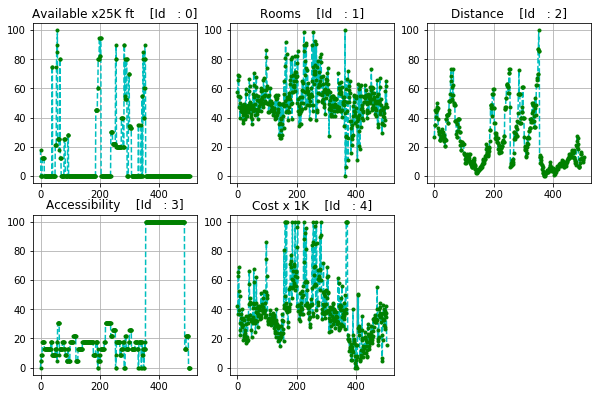

In [6]:
p_plt.dummy_DataFrame_plotter(case_data_Boston,
                        plot_size=(10,10), 
                        mixed_style=True,
                        plot_style=["c--", "g."], 
                        grid=True).show()

In [7]:
case_data_Boston.columns.tolist()

['Available x25K ft', 'Rooms', 'Distance', 'Accessibility', 'Cost x 1K']

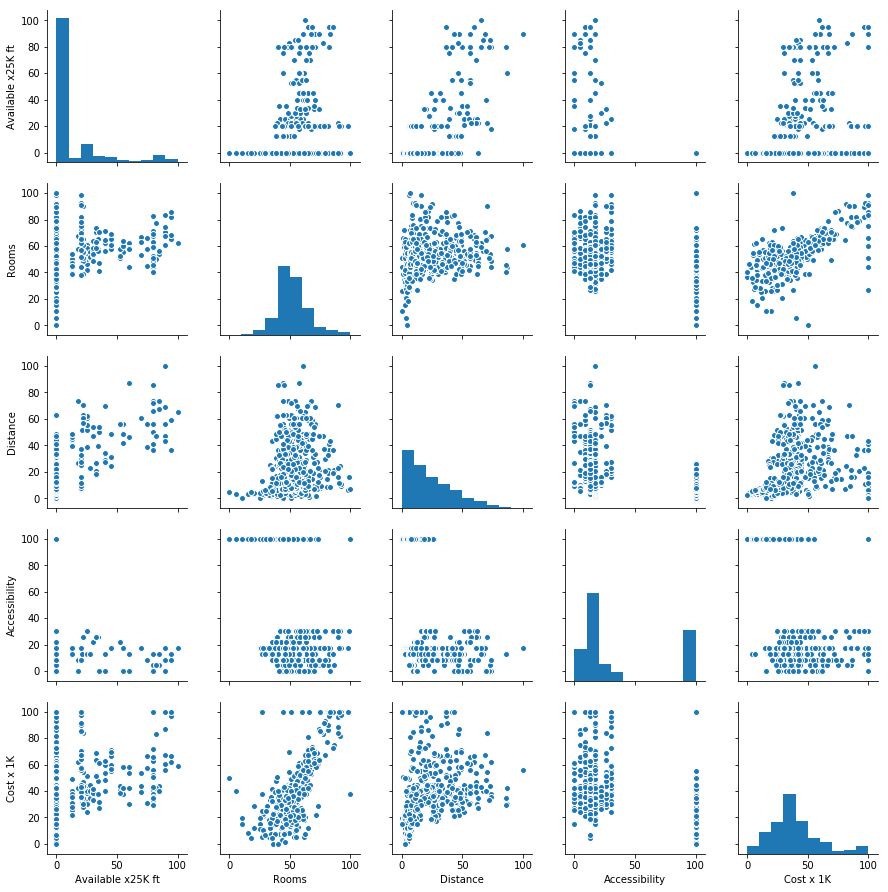

In [14]:
sns.pairplot(data=case_data_Boston, vars=case_data_Boston.columns.tolist())
plt.show()


In [ ]:
dummy_ii_df = case_data_Boston.copy()
dummy_ii_vals = case_data_Boston.values.copy()


meta_normalize_dummy = (dummy_ii_df - dummy_ii_df.mean()) / dummy_ii_df.std()


plt.figure(figsize=(10,10))

b = meta_normalize_dummy.boxplot(column=meta_normalize_dummy.columns[[0,1,2,3,4]].tolist(), rot=45)
plt.show()

In [ ]:
test_data = meta_normalize_dummy.copy()
i_x = 0
i_y = 3

ii_x = test_data.iloc[:, i_x].values
ii_y = test_data.iloc[:, i_y].values

plt.gcf().clear()

plt.plot(test_data.columns[[i_x]], test_data.columns[[i_y]])
plt.plot(ii_x, ii_y, "r.")
#plt.plot(ii_x, ii_y, "c--")

plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

z = test_data.index.values
x = ii_x
y = ii_y
ax.scatter(x, y, z, label='parametric curve')
ax.legend()

plt.show()

#### 1.3.1 Mean

In [ ]:
mean_Boston = case_data_Boston.mean().copy()

##### PLOT

In [ ]:
p_plt.dummy_DataFrame_plotter(case_data_Boston,
                        plot_size=(10,10),
                        mixed_style=True,
                        plot_style=['m.', 'y:'],
                        grid=True,
                        have_lines=True,
                        constant_values=mean_Boston.values).show()


#### 1.3.2 Median

In [ ]:
median_Boston = case_data_Boston.median()
print(median_Boston)

##### PLOT

In [ ]:
p_plt.dummy_DataFrame_plotter(case_data_Boston,
                        plot_size=(10,10),
                        mixed_style=True,
                        plot_style=['c.', 'y:'],
                        grid=True,
                        have_lines=True,
                        constant_values=median_Boston.values).show()


#### 1.3.3 Mode

In [ ]:
mode_Boston = case_data_Boston.mode(axis=1, numeric_only=True).copy()

histogram_container = []
for id_columns in range(mode_Boston.shape[1]):
    temp_bins, temp_ocurr = np.unique(mode_Boston.dropna().iloc[:, id_columns], 
                                              return_counts=True)
    
    histogram_container.append([copy(temp_ocurr), copy(temp_bins)])

##### PLOT

In [ ]:
p_plt.dummy_Histogram_plotter(histogram_container, grid_subplot=[5,1], plot_size=(12,10)).show()

##### 1.3.4 Quantile

In [ ]:
quantile_n = 200
quantile_container = []
for ii in range(quantile_n):
    quantile_float = ((ii + 1.0) / quantile_n)
    quantile_container.append(case_data_Boston.quantile(q=quantile_float, axis=0).values)

##### PLOT

In [ ]:
p_plt.dummy_DataFrame_plotter(case_data_Boston,
                        plot_size=(10,10),
                        grid=True,
                        plot_style='+',
                        have_lines=True,
                        constant_values=quantile_container).show()


#### 1.3.5 Unique

In [ ]:
unique_container = []
for id_columns in range(case_data_Boston.shape[1]):
    unique_temp = np.unique(case_data_Boston.dropna().iloc[:, id_columns])
    unique_container.append(unique_temp)

##### PLOT

In [ ]:
p_plt.dummy_DataFrame_plotter(case_data_Boston,
                        grid_subplot=[1,5],
                        plot_size=(15,6),
                        grid=True,
                        mixed_style=True,
                        plot_style=['go', ':'],
                        have_lines=True,
                        constant_values=unique_container).show()

#### 1.3.6 General Description

In [ ]:
case_data_Boston.describe(percentiles=None, include=None, exclude=None)

### 1.4 Hypotesis Related Questions and Answers

#### 1.4.1 the more close residential center is from the Industrial zone, the denser are?

Considering the [Plot 3] in 1.3.5 Section ***(Unique Descriptor)***, if we limit the plot range were the lower "distance" values are, the relation (in his strong definition) can be assumed as true.

Strong Hypothesis: + Near to, + People
Weak Hypothesis: - Near To, - People

In [ ]:
a_hypotesis_df = case_data_Boston.iloc[300:500, [0, 1, 3]].copy()

a_hypotesis_container = []
for id_columns in range(a_hypotesis_df.shape[1]):
    a_hypotesis_temp = np.unique(a_hypotesis_df.dropna().iloc[:, id_columns])
    a_hypotesis_container.append(a_hypotesis_temp)

p_plt.dummy_DataFrame_plotter(a_hypotesis_df,
                        grid_subplot=[1,3],
                        plot_size=(15,6),
                        grid=True,
                        mixed_style=True,
                        plot_style=['go', ':'],
                        have_lines=True,
                        constant_values=a_hypotesis_container
                       ).show()

#### 1.4.2 [1.4.1] being one of the closers,  implies more accessibility?

Yes, but not only. The more closest is, it is more probably have better accessibility

In [ ]:
b_hypotesis_df = case_data_Boston.iloc[300:500, [2, 3]].copy()

b_hypotesis_container = []
for id_columns in range(b_hypotesis_df.shape[1]):
    b_hypotesis_temp = np.unique(b_hypotesis_df.dropna().iloc[:, id_columns])
    b_hypotesis_container.append(b_hypotesis_temp)

p_plt.dummy_DataFrame_plotter(b_hypotesis_df,
                        grid_subplot=[1,2],
                        plot_size=(15,6),
                        grid=True,
                        mixed_style=True,
                        plot_style=['go', ':'],).show()

#### 1.4.3 rent increased the more nearly you are?

it is impossible to arrive at some conclusion (weak or strong), because of the standard deviation of the cost values arent near to the distance values

In [ ]:
c_hypotesis_df = case_data_Boston.iloc[300:500, [2, 4]].copy()

c_hypotesis_container = []
for id_columns in range(c_hypotesis_df.shape[1]):
    c_hypotesis_temp = np.unique(c_hypotesis_df.dropna().iloc[:, id_columns])
    c_hypotesis_container.append(c_hypotesis_temp)

p_plt.dummy_DataFrame_plotter(c_hypotesis_df,
                        grid_subplot=[1,2],
                        plot_size=(15,6),
                        grid=True,
                        mixed_style=True,
                        plot_style=['go', ':'],
                        ).show()

#### 1.5 Issues

* The data isn't normalize
* Have NaN values
* Small and not so detailed dictionary of variables 

_ _ _
___
_ _ _


## 2.- Data 2 - Instituições de Educação Superior
### 2.1.- Retrieving Data

#### 2.1.1.- Reading Data

In [ ]:
try :
    ieducations_dataset = pd.read_csv("./microdados_censo_superior_2014/2014/DADOS/DM_IES.CSV", sep='|', encoding='latin1')
except:
    print("ERROR, DATA NOT LOADED")
else:
    print("""DATA SUCCESSFULLY LOADED\n
    \tRows\t:\t{:d}\t|\tColumns\t:\t{:d}""".format(boston_dataset.shape[0], boston_dataset.shape[1]))

#### 2.1.2.- Data Labels

In [ ]:
ieducationals_descriptions = pd.read_excel("./microdados_censo_superior_2014/2014/ANEXOS/ANEXO I/ANEXO I - 2014.xlsx", encoding='latin1')
ieducationals_descriptions.columns = ieducationals_descriptions.iloc[0,:]
ieducationals_descriptions = ieducationals_descriptions.reindex(ieducationals_descriptions.index.drop(0))
ieducationals_descriptions

#### 2.1.3.- Viewing Data

In [ ]:
ieducations_dataset.iloc[10:15, :]

### 2.2.- Attributes Choose

#### 2.2.1.- Choosed Attributes and Hypothesis

**Hypothesis**: Private universities have the highest self-capital, but lower scientific investment (in comparison with national universities)

**Attributes**

* **DS_CATEGORIA_ADMINISTRATIVA (id 6)**        :  *Nome da Categoria Administrativa    *
    > Item Class.
* **DS_ORGANIZACAO_ACADEMICA (id 8)**        :  *Código da Organização Acadêmica*
    > Item Sub-Class
* **VL_RECEITA_PROPRIA (id 33)**       :  *Informa o valor das receitas próprias auferidas pela mantenedora ou pela IES no ano de referência*
    > Avaliable Expendable Money
* **VL_DES_INVESTIMENTO (id 40)**       :  *Informa o valor das despesas de investimentos (despesas de capital) realizados nas IES ou na mantenedora*
    > Expended Money I
* **VL_DES_PESQUISA (id 41)**     :  *Informa o valor das despesas com Pesquisa e Desenvolvimento da IES ou da mantenedora*
    > Expended Money I

#### 2.2.2.- Selecting Data

In [ ]:
case_ieducations_dataset = ieducations_dataset.iloc[:,[6, 8, 33, 40, 41]].copy()
case_ieducations_dataset.columns

#### 2.2.3.- Qualitative Data to Quantitave

In [ ]:
cat_admin_labels = np.unique(case_ieducations_dataset.iloc[:, 0]).copy()
cat_organ_labels = np.unique(case_ieducations_dataset.iloc[:, 1]).copy()

print("\n\t\tDS_CATEGORIA_ADMINISTRATIVA\t:\n", pd.DataFrame(cat_admin_labels), "\n", 
      "\n\t\tDS_ORGANIZACAO_ACADEMICA\t:\n", pd.DataFrame(cat_organ_labels), "\n\n")

# admin
ii = 0
labels = cat_admin_labels
temp_array = np.zeros(case_ieducations_dataset.shape[0], dtype=np.uint)
for dummy_category in labels:
    temp_whereis = (case_ieducations_dataset.iloc[:, ii] == dummy_category).astype(np.uint)
    temp_quantiv = np.where(labels == dummy_category)[0]
    temp_array +=  temp_whereis * np.uint(temp_quantiv)
    
case_ieducations_dataset.iloc[:, ii] = temp_array.T.copy()

# organ
ii = 1
labels = cat_organ_labels
temp_array = np.zeros(case_ieducations_dataset.shape[0], dtype=np.uint)
for dummy_category in labels:
    temp_whereis = (case_ieducations_dataset.iloc[:, ii] == dummy_category).astype(np.uint)
    temp_quantiv = np.where(labels == dummy_category)[0]    
    temp_array +=  temp_whereis * np.uint(temp_quantiv)
    
case_ieducations_dataset.iloc[:, ii] = temp_array.T.copy()

In [ ]:
case_ieducations_dataset = case_ieducations_dataset.sort_values(["DS_CATEGORIA_ADMINISTRATIVA", "DS_ORGANIZACAO_ACADEMICA"], ascending=[1, 0])
case_ieducations_dataset = case_ieducations_dataset.reset_index(drop=[0])

print(case_ieducations_dataset.iloc[10:15, :])

### 2.1.3 Data Exploration

In [ ]:
p_plt.dummy_DataFrame_plotter(case_ieducations_dataset,
                        plot_size=(15,15), 
                        mixed_style=True,
                        plot_style=["c--", "g."], 
                        grid=True).show()

#### 1.3.1 Mean

In [ ]:
mean_ieducations = case_ieducations_dataset.mean().copy()
print(mean_ieducations)

##### PLOT

In [ ]:
p_plt.dummy_DataFrame_plotter(case_ieducations_dataset,
                        plot_size=(15,15),
                        mixed_style=True,
                        plot_style=['m.', 'y:'],
                        grid=True,
                        have_lines=True,
                        constant_values=mean_ieducations.values).show()


#### 2.3.2 Median

In [ ]:
median_ieducations = case_ieducations_dataset.median()
print(median_ieducations)

##### PLOT

In [ ]:
p_plt.dummy_DataFrame_plotter(case_ieducations_dataset,
                        plot_size=(15,15),
                        mixed_style=True,
                        plot_style=['c.', 'y:'],
                        grid=True,
                        have_lines=True,
                        constant_values=median_ieducations.values).show()


#### 1.3.3 Mode

In [ ]:
mode_ieducations = case_ieducations_dataset.mode(axis=1, numeric_only=True).copy()

histogram_container = []
for id_columns in range(mode_ieducations.shape[1]):
    temp_bins, temp_ocurr = np.unique(mode_ieducations.dropna().iloc[:, id_columns], 
                                              return_counts=True)
    
    histogram_container.append([copy(temp_ocurr), copy(temp_bins)])

##### PLOT

In [ ]:
p_plt.dummy_Histogram_plotter(histogram_container, grid_subplot=[5,1], plot_size=(15,12)).show()

##### 2.3.4 Quantile

In [ ]:
quantile_n = 5
quantile_container = []
for ii in range(quantile_n):
    quantile_float = ((ii + 1.0) / quantile_n)
    quantile_container.append(case_ieducations_dataset.quantile(q=quantile_float, axis=0).values)

##### PLOT

In [ ]:
p_plt.dummy_DataFrame_plotter(case_ieducations_dataset,
                        plot_size=(15,15),
                        grid=True,
                        plot_style='+',
                        have_lines=True,
                        constant_values=quantile_container).show()


#### 2.3.5 Unique

In [ ]:
unique_container = []
for id_columns in range(case_ieducations_dataset.shape[1]):
    unique_temp = np.unique(case_ieducations_dataset.dropna().iloc[:, id_columns])
    unique_container.append(unique_temp)

##### PLOT

In [ ]:
p_plt.dummy_DataFrame_plotter(case_ieducations_dataset,
                        grid_subplot=[1,5],
                        plot_size=(20,15),
                        grid=True,
                        mixed_style=True,
                        plot_style=['go', ':'],
                        have_lines=True,
                        constant_values=unique_container).show()

#### 2.3.6 General Description

In [ ]:
case_ieducations_dataset.describe(percentiles=None, include=None, exclude=None)

### 2.4 Hypotesis Related Questions and Answers

#### 2.4.1 are private universities expending less money in research?

in a general way, yes, but some institutions are in the "higher research budget"  group.

In [ ]:
ieducations_h1 = case_ieducations_dataset.loc[(case_ieducations_dataset["DS_CATEGORIA_ADMINISTRATIVA"].isin([1,2])) 
                                              & (case_ieducations_dataset["DS_ORGANIZACAO_ACADEMICA"].isin([1,2,4]))]

ieducations_h1 = ieducations_h1["VL_DES_PESQUISA"]

plt.figure(figsize=(5, 5))

plt.plot(case_ieducations_dataset["VL_DES_PESQUISA"], "c*")

plt.plot(ieducations_h1, "g--")
plt.plot(ieducations_h1, "r,")

plt.show()

#### 2.4.2 have public universities less self-capital?

Yes, but some values could be interpreted as part of the "lower bound" in the "higher values" group

In [ ]:
ieducations_h2 = case_ieducations_dataset.loc[(case_ieducations_dataset["DS_CATEGORIA_ADMINISTRATIVA"].isin([3,4,5])) 
                                              & (case_ieducations_dataset["DS_ORGANIZACAO_ACADEMICA"].isin([1,2,4]))]

ieducations_h2 = ieducations_h2["VL_RECEITA_PROPRIA"]

plt.figure(figsize=(5, 5))

plt.plot(case_ieducations_dataset["VL_RECEITA_PROPRIA"], "c*")

plt.plot(ieducations_h2, "g--")
plt.plot(ieducations_h2, "r,")

plt.show()

#### 2.4.3 are private universities earning more money for his investment?

Not Conclusive

In [ ]:
ieducations_h3 = case_ieducations_dataset.loc[(case_ieducations_dataset["DS_CATEGORIA_ADMINISTRATIVA"].isin([1,2])) 
                                              & (case_ieducations_dataset["DS_ORGANIZACAO_ACADEMICA"].isin([1,2,4]))]

ieducations_h3 = ieducations_h3["VL_DES_INVESTIMENTO"]

plt.figure(figsize=(5, 5))

plt.plot(case_ieducations_dataset["VL_RECEITA_PROPRIA"], "c*")

plt.plot(ieducations_h3, "g--")
plt.plot(ieducations_h3, "r,")

plt.show()

#### 1.5 Issues

* The data isn't normalize
* Categorical Variables
* Excessive Heterogene Data Set